<a href="https://colab.research.google.com/github/EniolaWebsterEsho/Prediction-Codes/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
diabetes = pd.read_csv('diabetes.csv',header=None)
diabetes.columns = ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'insulin','Body mass index','Diabetes pedigree function','Age','Class']
diabetes

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [ ]:
diabetes.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
insulin                         0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

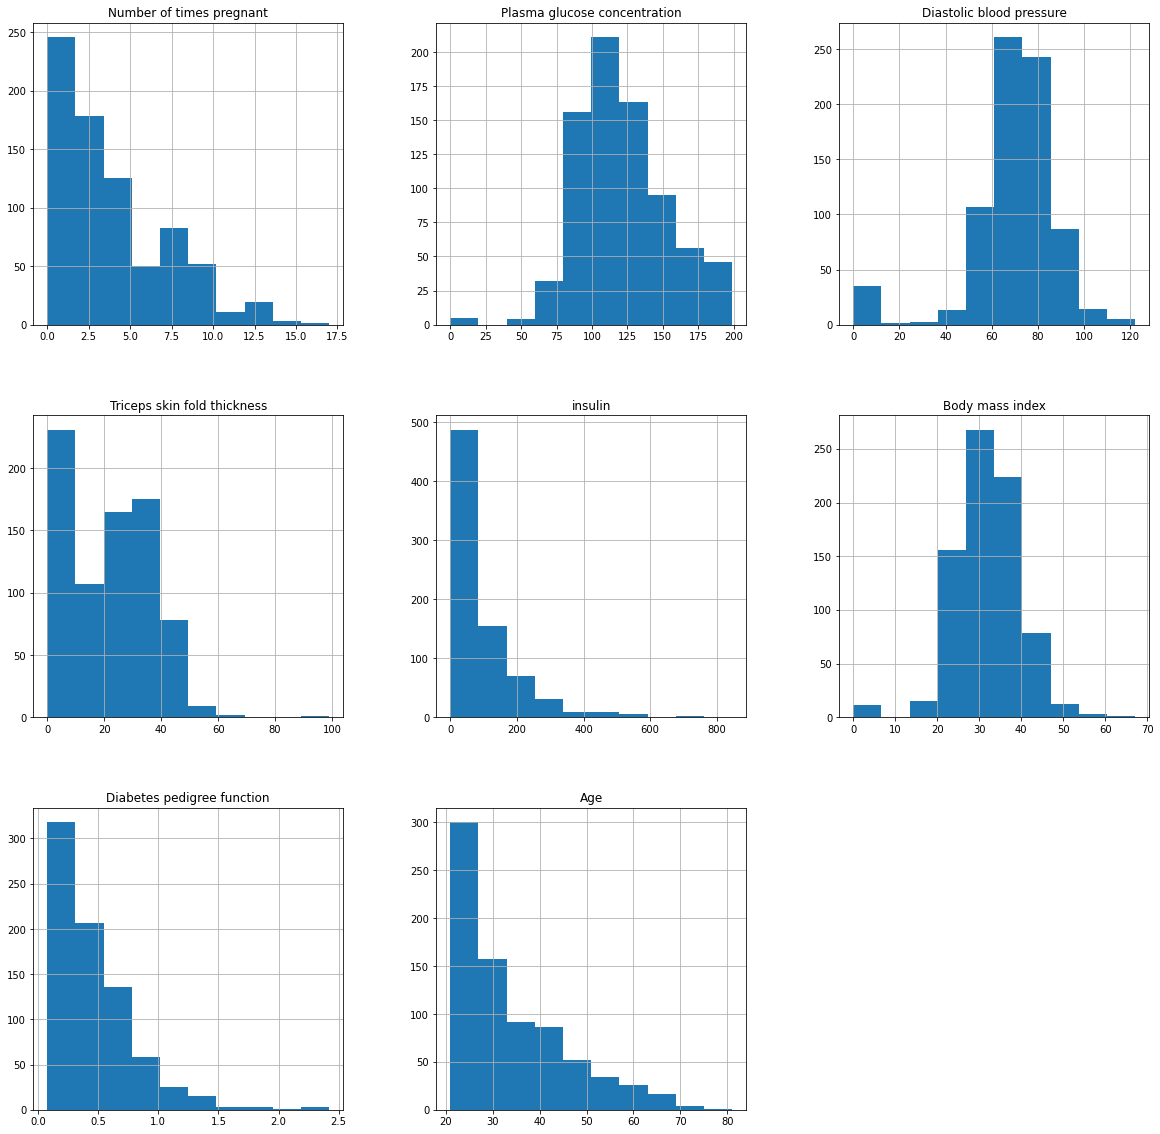

In [ ]:
p = diabetes.hist(figsize = (20,20))
pyplot.savefig("Diabetes.png")

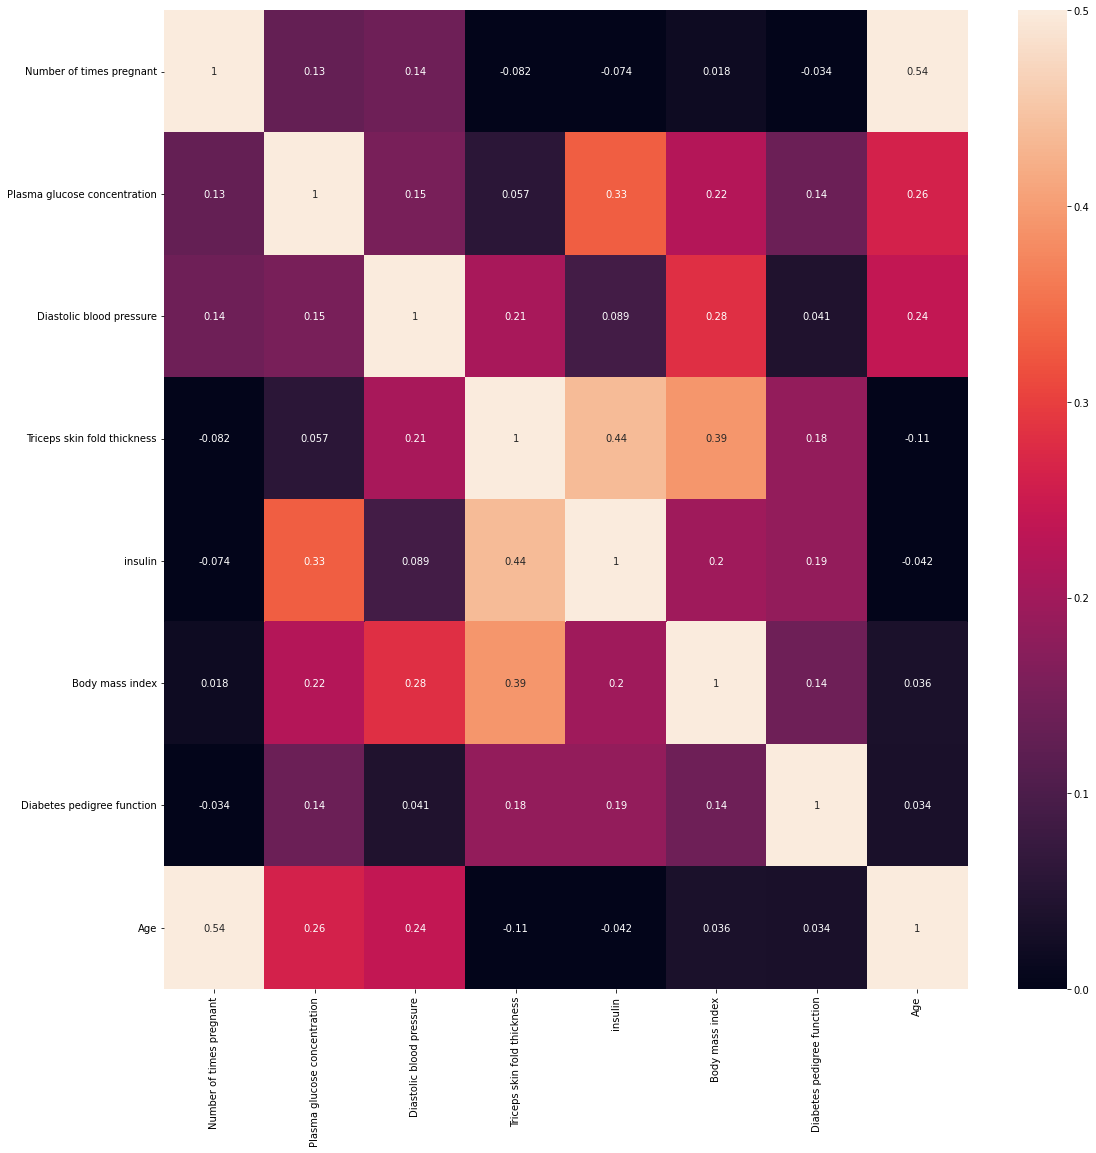

In [ ]:
pyplot.figure(figsize=(18,18))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes.corr(), annot=True,vmin=0, vmax=0.5)
pyplot.savefig("Corr.png")


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(diabetes[["Class"]]).toarray())

#merge one-hot encoded columns back with original DataFrame
df_diabetes = diabetes.join(encoder_df)
df_diabetes

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,Class,0,1
0,6,148,72,35,0,33.6,0.627,50,tested_positive,0.0,1.0
1,1,85,66,29,0,26.6,0.351,31,tested_negative,1.0,0.0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,0.0,1.0
3,1,89,66,23,94,28.1,0.167,21,tested_negative,1.0,0.0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative,1.0,0.0
764,2,122,70,27,0,36.8,0.340,27,tested_negative,1.0,0.0
765,5,121,72,23,112,26.2,0.245,30,tested_negative,1.0,0.0
766,1,126,60,0,0,30.1,0.349,47,tested_positive,0.0,1.0


In [ ]:
df_diabetes.drop('Class', axis=1, inplace=True)

In [ ]:
df_diabetes.columns = ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'insulin','Body mass index','Diabetes pedigree function','Age','tested_negative', 'tested_positive']
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,tested_negative,tested_positive
0,6,148,72,35,0,33.6,0.627,50,0.0,1.0
1,1,85,66,29,0,26.6,0.351,31,1.0,0.0
2,8,183,64,0,0,23.3,0.672,32,0.0,1.0
3,1,89,66,23,94,28.1,0.167,21,1.0,0.0
4,0,137,40,35,168,43.1,2.288,33,0.0,1.0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
     # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables
    print(f'num_cols: {len(num_cols)}')  # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}')  # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}')  # the number of categorical variables that looks numerical
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(diabetes)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 0


In [ ]:
print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)
print("Cardinal columns:", cat_but_car)

Categorical columns: ['Class']
Numerical columns: ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'insulin', 'Body mass index', 'Diabetes pedigree function', 'Age']
Cardinal columns: []


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Number of times pregnant"]
for i in num_cols_miss:
  df_diabetes[i] = df_diabetes.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [ ]:
df_diabetes

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,tested_negative,tested_positive
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,0.0,1.0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,1.0,0.0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,0.0,1.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,1.0,0.0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27.0,1.0,0.0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,1.0,0.0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47.0,0.0,1.0


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_diabetes.iloc[:,1:8])
df_diabetes.iloc[:,1:8] = imp.transform(df_diabetes.iloc[:,1:8])
print(df_diabetes.iloc[:,1:8])

     Plasma glucose concentration  Diastolic blood pressure  \
0                           148.0                      72.0   
1                            85.0                      66.0   
2                           183.0                      64.0   
3                            89.0                      66.0   
4                           137.0                      40.0   
..                            ...                       ...   
763                         101.0                      76.0   
764                         122.0                      70.0   
765                         121.0                      72.0   
766                         126.0                      60.0   
767                          93.0                      70.0   

     Triceps skin fold thickness     insulin  Body mass index  \
0                       35.00000  155.548223             33.6   
1                       29.00000  155.548223             26.6   
2                       29.15342  155.548223    

In [ ]:
df_diabetes

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,tested_negative,tested_positive
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,0.0,1.0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,1.0,0.0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,0.0,1.0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,1.0,0.0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,1.0,0.0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,1.0,0.0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,1.0,0.0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,0.0,1.0


In [ ]:
diabetesnp = df_diabetes.to_numpy()
print(diabetesnp)
print(type(diabetesnp))
print(np.shape(diabetesnp))

[[  6. 148.  72. ...  50.   0.   1.]
 [  1.  85.  66. ...  31.   1.   0.]
 [  8. 183.  64. ...  32.   0.   1.]
 ...
 [  5. 121.  72. ...  30.   1.   0.]
 [  1. 126.  60. ...  47.   0.   1.]
 [  1.  93.  70. ...  23.   1.   0.]]
<class 'numpy.ndarray'>
(768, 10)


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(diabetesnp)
scaled_df=pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1.0,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.0,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1.0,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.0,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.0,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.0,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.0,1.0


In [ ]:
df_scaled = scaled_df.copy()
df_scaled.columns= ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'insulin','Body mass index','Diabetes pedigree function','Age','tested_negative', 'tested_positive']
df_scaled

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,insulin,Body mass index,Diabetes pedigree function,Age,tested_negative,tested_positive
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1.0,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.0,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1.0,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.0,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.0,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.0,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.0,1.0


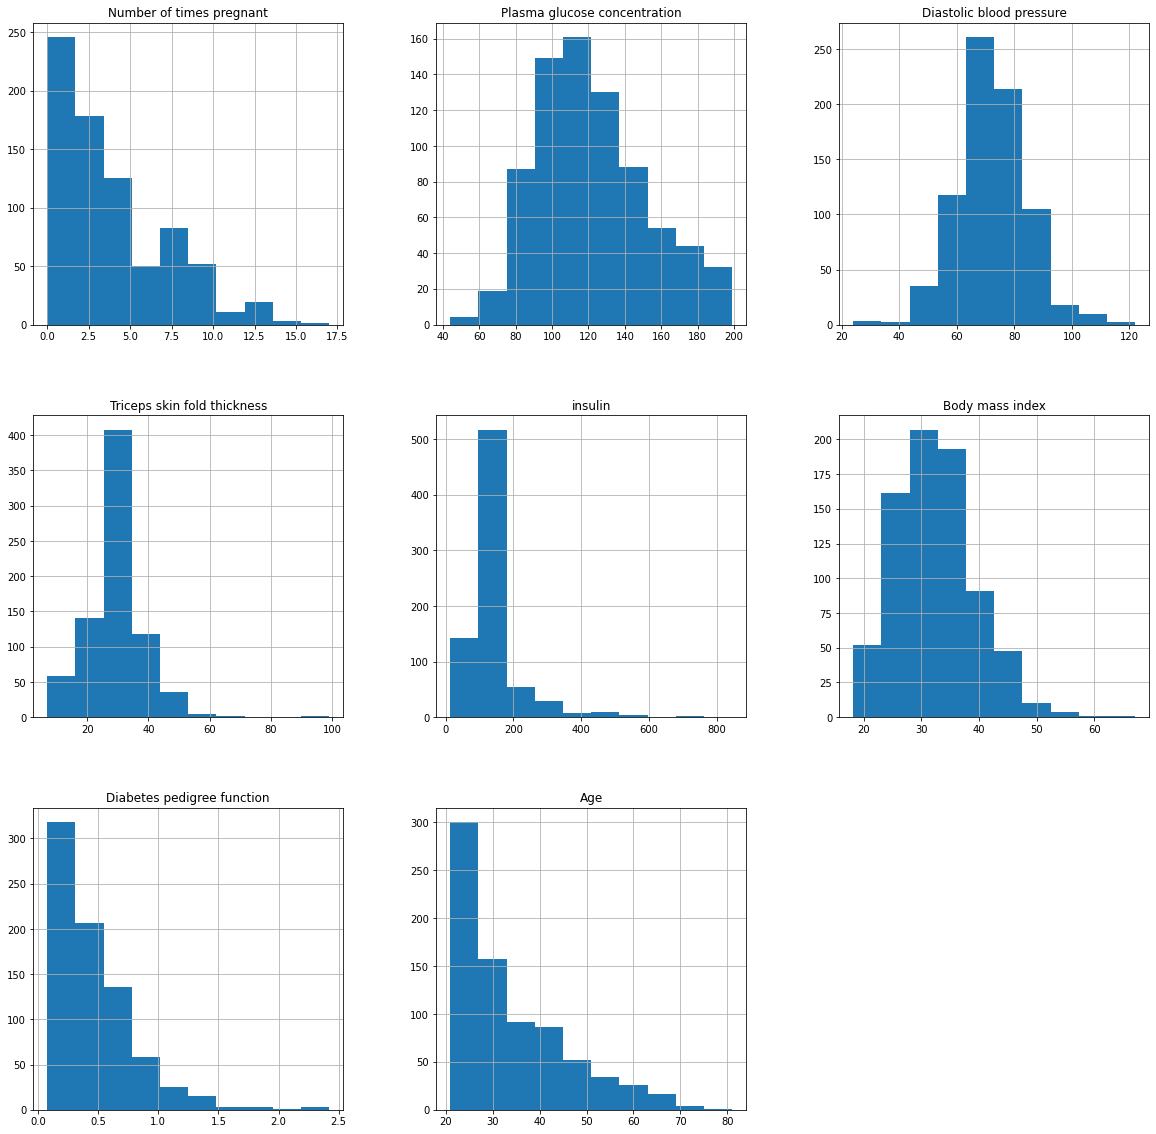

In [ ]:
p = diabetes.hist(figsize = (20,20))

In [ ]:
X = df_scaled.loc[:,['Number of times pregnant','Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skin fold thickness', 'insulin','Body mass index','Diabetes pedigree function','Age']]
y = df_scaled.loc[:,['tested_positive']]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(614, 8) (154, 8)
(614, 1) (154, 1)


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [ ]:
tree = DecisionTreeClassifier()
clf = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred)

print(f'The accuracy for decision tree is {round(100 * acc_tree, 2)}%')

The accuracy for decision tree is 79.22%


In [ ]:
clf.score(X_test, y_test)

0.7922077922077922

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.06


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(
    clf, X, y, cv=5, scoring='f1_macro')
scores

{'fit_time': array([0.01024842, 0.00803781, 0.00503707, 0.00553918, 0.00517678]),
 'score_time': array([0.00446296, 0.00245476, 0.00221705, 0.00224733, 0.0022676 ]),
 'test_score': array([0.67751761, 0.6413096 , 0.66345841, 0.78113747, 0.68535081])}

In [ ]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
from sklearn.model_selection import cross_validate
scores = cross_validate(
    clf, X, y, cv=5, scoring=scoring)
scores

{'fit_time': array([0.01136923, 0.00539041, 0.00558949, 0.00549126, 0.00514054]),
 'score_time': array([0.00742197, 0.00505257, 0.00474   , 0.00431681, 0.00423074]),
 'test_precision_macro': array([0.66106582, 0.67122009, 0.72158766, 0.77663848, 0.68755213]),
 'test_recall_macro': array([0.65      , 0.68685185, 0.71555556, 0.74688679, 0.66971698]),
 'test_f1_macro': array([0.65380016, 0.67012022, 0.7182266 , 0.75714286, 0.6754797 ])}

In [ ]:
from pandas import DataFrame
scoresFrame = DataFrame(scores)
scoresFrame

,fit_time,score_time,test_precision_macro,test_recall_macro,test_f1_macro
0,0.011369,0.007422,0.661066,0.650000,0.653800
1,0.005390,0.005053,0.671220,0.686852,0.670120
2,0.005589,0.004740,0.721588,0.715556,0.718227
3,0.005491,0.004317,0.776638,0.746887,0.757143
4,0.005141,0.004231,0.687552,0.669717,0.675480


In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_test,  y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       107
         1.0       0.65      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



In [ ]:
cm = confusion_matrix(y_test,  y_pred)


print(cm)

[[89 18]
 [14 33]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1296x1296 with 0 Axes>

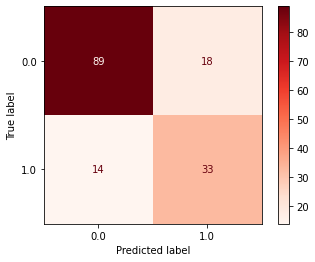

In [ ]:
pyplot.figure(figsize=(18,18))
p = plot_confusion_matrix(tree,X_test,y_test,cmap=pyplot.cm.Reds)
pyplot.show()

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr= LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8181818181818182

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f'The accuracy for Logistic Regression is {round(100 * acc_lr, 2)}%' )

The accuracy for Logistic Regression is 81.82%


In [ ]:
cm_lr = confusion_matrix(y_test,  y_pred_lr)


print(cm_lr)

[[99  8]
 [20 27]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


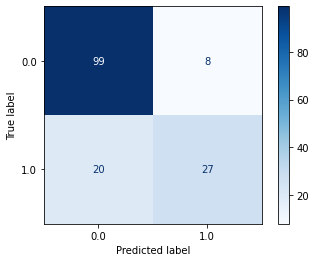

In [ ]:
plot_confusion_matrix(model_lr,X_test,y_test,cmap=pyplot.cm.Blues)
pyplot.show()

In [ ]:
from sklearn.metrics import classification_report
report_lr = classification_report(y_test,  y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

